# Exploratory Data Analysis

## Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import pickle

import nltk
from nltk.corpus import stopwords
from string import punctuation
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from nltk import ngrams

import plotly_express as px
import plotly.graph_objects as go

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings("ignore")

print('All Libraries Imported')

All Libraries Imported


## Import Data

In [2]:
hotels = pd.read_pickle('all_hotel_tweets.pkl')
hotels.reset_index(inplace=True)
hotels.drop('index', axis=1, inplace=True)
hotels.head(2)

,Created At,Hotel,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
0,2019-12-13 14:47:03,Stregis,Polo anyone?\r\n#StRegis World Snow #Polo Cham...,0.4404,0.0,0.0,1,"[polo, anyone, world, snow, polo, championship...","[polo, anyone, world, snow, polo, championship...",polo anyone world snow polo championship held ...
1,2019-12-13 13:05:34,Stregis,Fantastic night at the @TheStRegisMC celebrati...,0.8074,0.4,0.9,1,"[fantastic, night, celebrating, th, anniversary]","[fantastic, night, celebrating, th, anniversary]",fantastic night celebrating th anniversary


In [3]:
#check for missing data
total = hotels.isnull().sum().sort_values(ascending=False)
percent = (hotels.isnull().sum()/hotels.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Tweet_Strings,0,0.0
Lemmatized,0,0.0
cleaned_tweets,0,0.0
Sentiment,0,0.0
Subjectivity,0,0.0
Sentiment_TextBlob,0,0.0
Sentiment_VADER,0,0.0
Tweets,0,0.0
Hotel,0,0.0
Created At,0,0.0


Combine hotel tweets into three categories: Luxury, Premium, Select

In [4]:
Luxury = ['Stregis','Ritzcarlton','Jwmarriott','Whotels']
Premium = ['Westin','Sheraton','Renaissance','Marriott']
Select = ['Springhillsuites','Courtyardbymarriott','Fairfieldinn','Residenceinn']

hotel_classes = []

for i in hotels['Hotel']:
    if i in Luxury:
        hotel_classes.append('Luxury')
    elif i in Premium:
        hotel_classes.append('Premium')
    else:
        hotel_classes.append('Select')
           
hotels['Class'] = hotel_classes

In [5]:
hotels.drop('Hotel', axis=1, inplace=True)

In [6]:
otas = pd.read_pickle('all_ota_tweets.pkl')
otas.reset_index(inplace=True)
otas.drop('index', axis=1, inplace=True)
otas.head(2)

,Created At,OTA,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
0,2019-12-13 23:00:08,Expedia,#BREAKING\r\n\r\nMy Office has reached a settl...,0.6705,0.250,0.4375,1,"[breaking, office, reached, settlement, failin...","[breaking, office, reached, settlement, failin...",breaking office reached settlement failing kee...
1,2019-12-13 22:50:07,Expedia,#ad Find out what 10 destinations are hot with...,0.6996,0.625,0.9250,1,"[ad, find, destinations, hot, travelers, trave...","[ad, find, destination, hot, traveler, travel,...",ad find destination hot traveler travel trend ...


In [7]:
#check for missing data
total = otas.isnull().sum().sort_values(ascending=False)
percent = (otas.isnull().sum()/otas.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Tweet_Strings,0,0.0
Lemmatized,0,0.0
cleaned_tweets,0,0.0
Sentiment,0,0.0
Subjectivity,0,0.0
Sentiment_TextBlob,0,0.0
Sentiment_VADER,0,0.0
Tweets,0,0.0
OTA,0,0.0
Created At,0,0.0


In [8]:
otas.rename(columns={'OTA':'Class'},inplace=True)

Combine hotel tweets into three categories: Expedia, Priceline, Booking.com

In [9]:
Expedia = 'Expedia'
Priceline = 'Priceline'
Booking = ['@booking.com','#booking.com']

ota_classes = []

for i in otas['Class']:
    if i in Booking:
        ota_classes.append('Booking.com')
    elif i in Priceline:
        ota_classes.append('Priceline')
    else:
        ota_classes.append('Expedia')
           
otas['Class'] = ota_classes

In [10]:
otas.tail(2)

,Created At,Class,Tweets,Sentiment_VADER,Sentiment_TextBlob,Subjectivity,Sentiment,cleaned_tweets,Lemmatized,Tweet_Strings
5353,2019-12-05 03:24:01,Booking.com,#jamaican book https://t.co/ZFMaAvtntV #hotels...,0.0,0.1,0.4,1,"[jamaican, book]","[jamaican, book]",jamaican book
5354,2019-12-05 01:46:14,Booking.com,1BR 950sf suite at MGM 17 #Vegas #holidays #va...,0.0,0.0,0.0,1,"[br, sf, suite, mgm, vegas, holidays, vacation...","[br, sf, suite, mgm, vega, holiday, vacation, ...",br sf suite mgm vega holiday vacation summer t...


Combine hotel and ota dataframes

In [11]:
dataframes = [hotels,otas]
all_data = pd.concat(dataframes)
all_data.reset_index(inplace=True)
all_data.drop('index', axis=1, inplace=True)
all_data.head(2)

,Class,Created At,Lemmatized,Sentiment,Sentiment_TextBlob,Sentiment_VADER,Subjectivity,Tweet_Strings,Tweets,cleaned_tweets
0,Luxury,2019-12-13 14:47:03,"[polo, anyone, world, snow, polo, championship...",1,0.0,0.4404,0.0,polo anyone world snow polo championship held ...,Polo anyone?\r\n#StRegis World Snow #Polo Cham...,"[polo, anyone, world, snow, polo, championship..."
1,Luxury,2019-12-13 13:05:34,"[fantastic, night, celebrating, th, anniversary]",1,0.4,0.8074,0.9,fantastic night celebrating th anniversary,Fantastic night at the @TheStRegisMC celebrati...,"[fantastic, night, celebrating, th, anniversary]"


In [12]:
all_data.to_pickle('all_data.pkl')

# Visualizations

Data visualizations are graphical representations of data that allow us to see and understand trends, outliers, and patterns in data. It also helps make difficult concepts easy to grasp. 

## Tweets by Category

In [16]:
all_data.groupby('Class').count()['Tweets'].iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
                                                  title='Distribution of Tweets by Category', xTitle='Division Name')

We can see that the majority of tweets gathered are for Premium hotels. 

## Sentiment Type

Each tweet was given a sentiment score using VADER. The VADER compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). This metric was used to analyze sentiment. 

In [17]:
y0 = all_data.loc[all_data['Class'] == 'Luxury']['Sentiment_VADER']
y1 = all_data.loc[all_data['Class'] == 'Premium']['Sentiment_VADER']
y2 = all_data.loc[all_data['Class'] == 'Select']['Sentiment_VADER']
y3 = all_data.loc[all_data['Class'] == 'Expedia']['Sentiment_VADER']
y4 = all_data.loc[all_data['Class'] == 'Priceline']['Sentiment_VADER']
y5 = all_data.loc[all_data['Class'] == 'Booking.com']['Sentiment_VADER']

trace0 = go.Box(
    y=y0,
    name = 'Luxury Hotels',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Premium Hotels',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Select-Service Hotels',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Expedia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Priceline',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Booking.com',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = {'text':"Distribution of Sentiment by Class", 'y':0.9,
        'x':0.5, 'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data=data,layout=layout)
fig.show()
#iplot(fig, filename = "Sentiment Polarity Boxplot of Category Name")

The first quartile for all classes is 0. This indicates that all classes received mostly neutral to positive tweets. The median score for Luxury Hotels is highest, indicating that Twitter users are most satisfied with Luxury Hotels. The median score for Expedia is lowest, indicating users are least satisfied with Expedia. 

### Distribution of Sentiment by Class

The percentage of positive, neutral and negative tweets will be determined and charted. 

In [18]:
all_data['Sentiment_Type'] = all_data['Sentiment_VADER'].apply(lambda x: 'Positive' if x > 0 else
                                                               ( 'Negative' if x < 0 else 'Neutral'))

In [19]:
print('Count by Sentiment Type\n')
counts = pd.crosstab(index=all_data["Sentiment_Type"], 
                            columns=all_data["Class"],
                             margins=True)   # Include row and column totals

counts.columns = ["Booking.com","Expedia","Luxury","Premium","Priceline","Select","row_total"]
counts.index= ["Negative","Neutral","Positive", "col_total"]

counts

Count by Sentiment Type



,Booking.com,Expedia,Luxury,Premium,Priceline,Select,row_total
Negative,99,822,73,1412,126,8,2540
Neutral,414,783,226,4219,132,29,5803
Positive,646,1973,716,7846,360,52,11593
col_total,1159,3578,1015,13477,618,89,19936


In [20]:
print('Percentge of Tweet Sentiment Type\n')
counts/counts.ix["col_total"]

Percentge of Tweet Sentiment Type



,Booking.com,Expedia,Luxury,Premium,Priceline,Select,row_total
Negative,0.085418,0.229737,0.071921,0.104771,0.203883,0.089888,0.127408
Neutral,0.357204,0.218837,0.222660,0.313052,0.213592,0.325843,0.291081
Positive,0.557377,0.551425,0.705419,0.582177,0.582524,0.584270,0.581511
col_total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


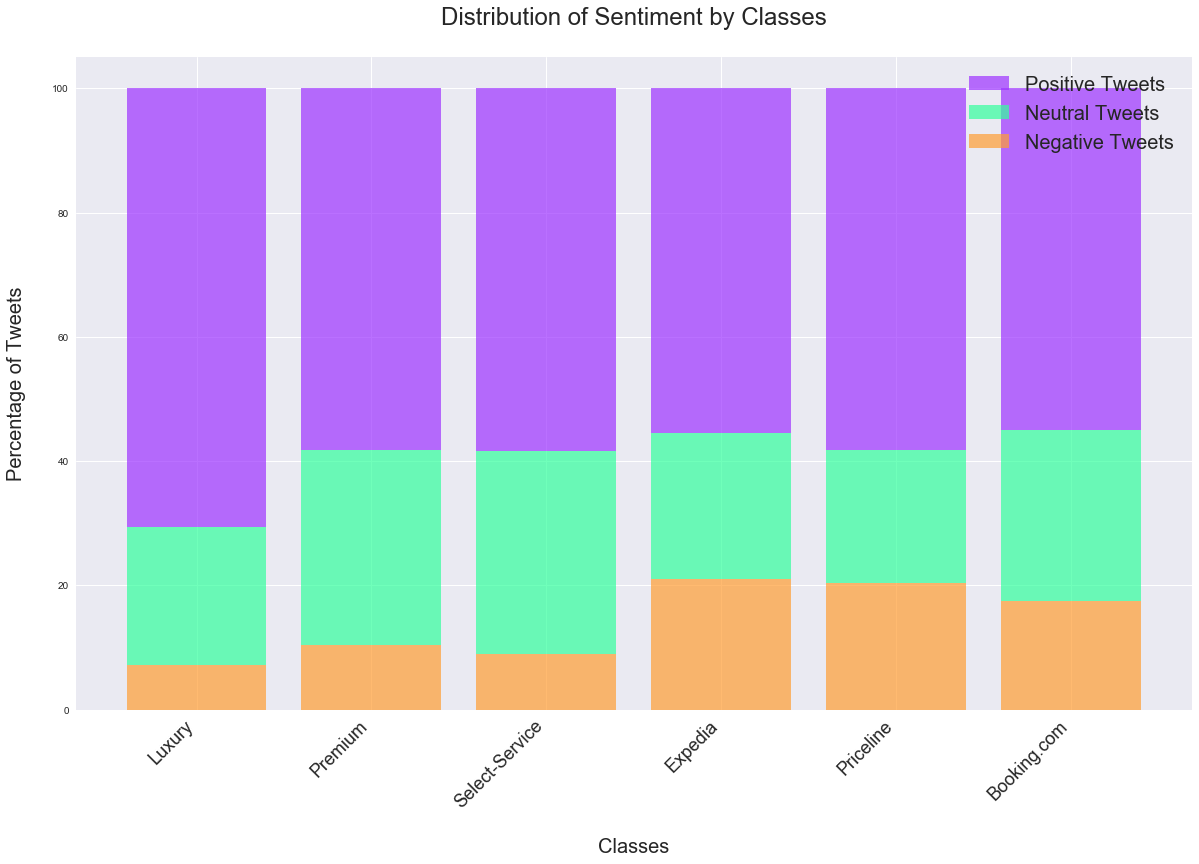

In [21]:
pos = np.array([70.54, 58.22, 58.43, 55.56, 58.25, 54.97])
neu = np.array([22.27, 31.31, 32.58, 23.42, 21.36, 27.51])
neg = np.array([7.19, 10.47, 8.99, 21.03, 20.39, 17.53])

classes = ['Luxury', 'Premium', 'Select-Service', 'Expedia', 'Priceline', 'Booking.com']

ind = [x for x, _ in enumerate(classes)]

total = pos + neu + neg

proportion_pos = np.true_divide(pos, total) * 100
proportion_neu = np.true_divide(neu, total) * 100
proportion_neg = np.true_divide(neg, total) * 100

plt.rcParams['figure.figsize'] = [20, 12]
plt.bar(ind, pos, width=0.8, alpha=0.7, label='Positive Tweets', color='#9D33FF', bottom=proportion_neu+proportion_neg)
plt.bar(ind, neu, width=0.8, alpha=0.7, label='Neutral Tweets', color='#33FF9D', bottom=proportion_neg)
plt.bar(ind, neg, width=0.8, alpha=0.7, label='Negative Tweets', color='#FF9D33')

plt.xticks(ind, classes, fontsize=18)
plt.ylabel("Percentage of Tweets\n", fontsize =20)
plt.xlabel("\nClasses", fontsize =20)
plt.title('Distribution of Sentiment by Classes\n', fontsize = 24)
plt.ylim=1.0
plt.legend(loc='best',fontsize = 20)
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

As stated earlier, Expedia has the highest dissatisfaction, with the 22.9% negative tweets and 55% positive tweets. Luxury hotels are viewed overwhelmingly favorably with 70.5% positive tweets and 7.1% negative tweets. 

## Sentiment Polarity vs. Tweet Subjectivity

TextBlob was used to create a subjectivity score for all tweets, indicating whether the tweet is primarily fact or opinion. 

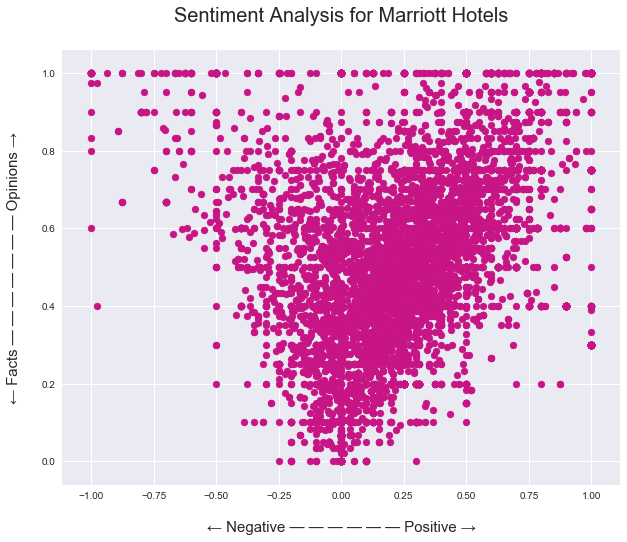

In [22]:
#plot subjectivity vs. polarity
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(hotels.index):
    x = hotels['Sentiment_TextBlob'].loc[Tweets]
    y = hotels['Subjectivity'].loc[Tweets]
    plt.scatter(x, y, color='#C71585')

plt.title('Sentiment Analysis for Marriott Hotels\n', fontsize = 20)
plt.xlabel('\n← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →\n', fontsize=15)
plt.show()

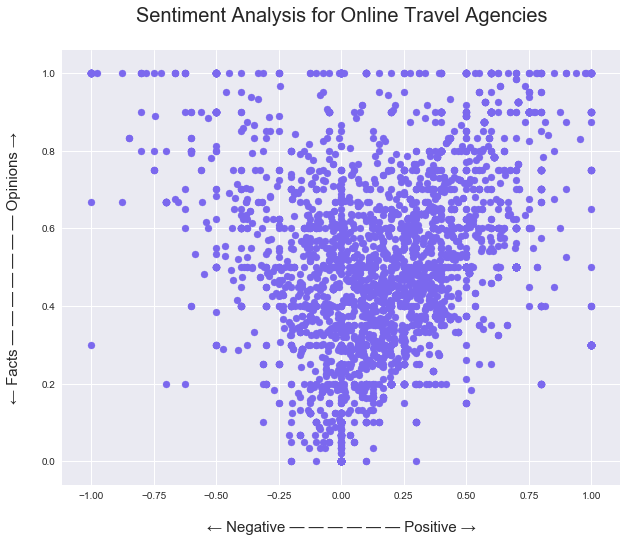

In [23]:
#plot subjectivity vs. polarity
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(otas.index):
    x = otas['Sentiment_TextBlob'].loc[Tweets]
    y = otas['Subjectivity'].loc[Tweets]
    plt.scatter(x, y, color='#7B68EE')

plt.title('Sentiment Analysis for Online Travel Agencies\n', fontsize = 20)
plt.xlabel('\n← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →\n', fontsize=15)
plt.show()

More factual tweets tend to be neutral in sentiment. Opinion-based tweets range from negative to positive, although they trend towards positive for both Hotels and Online Travel Agencies. 

## Word Clouds

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

List of stop words created

In [24]:
stop_words = stopwords.words("english") 
stop_words += list(punctuation) 
stop_words += ["/n","''", '""', '...', '``',"'",'’','amp','&', '-','/','and','a', 'or', 'in','for',"n't"]
stop_words += ['stregis','jwmarriott','ritzcarlton','whotels', 'westin','sheraton','marriott','renaissancehotels',
               'residenceinn','fairfieldinn','springhillsuites','courtyardbymarriott','jw','hotel','ritz','carlton',
               '_zalokar','_fairfieldinn','priceline','expedia','booking.com','com','zalokar','residence inn','regis']

### Positive Hotel Tweets

In [25]:
hotel_positive_tweets = pd.DataFrame(hotels.loc[hotels['Sentiment_VADER'] > 0])
hotel_negative_tweets = pd.DataFrame(hotels.loc[hotels['Sentiment_VADER'] < 0])

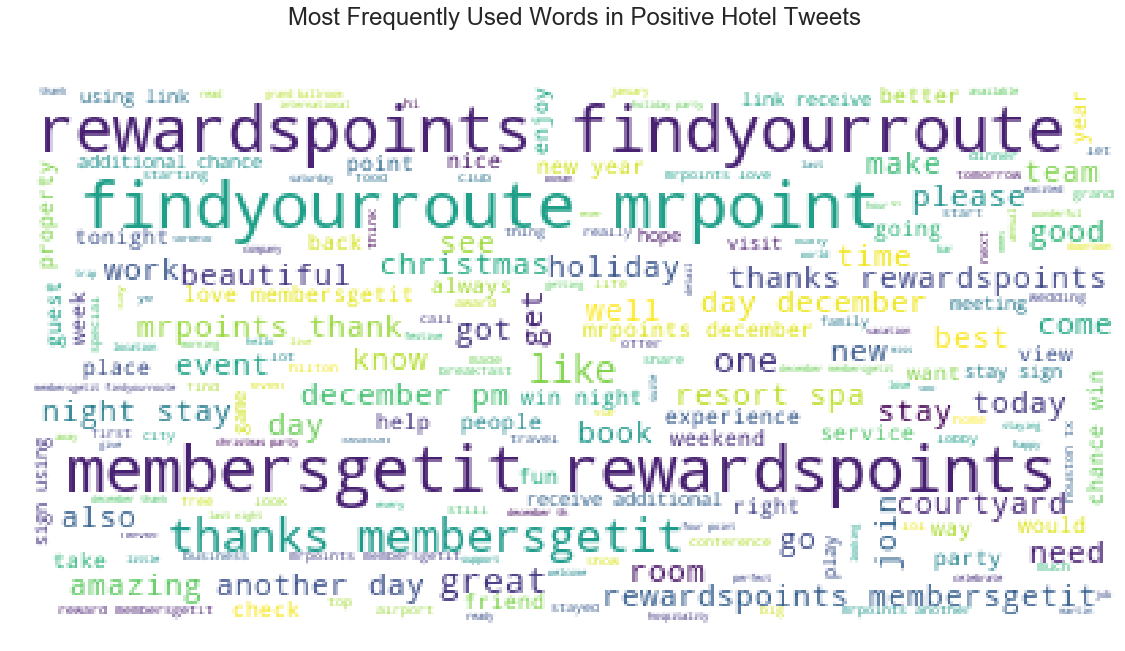

In [26]:
def wordcloud(tweets,col):
    stopwords = stop_words
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 42).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most Frequently Used Words in Positive Hotel Tweets\n\n", fontsize =24)
wordcloud(hotel_positive_tweets,'Tweet_Strings')  

We can see that membership rewards is very important in positve hotel tweets. 

### Negative Hotel Tweets

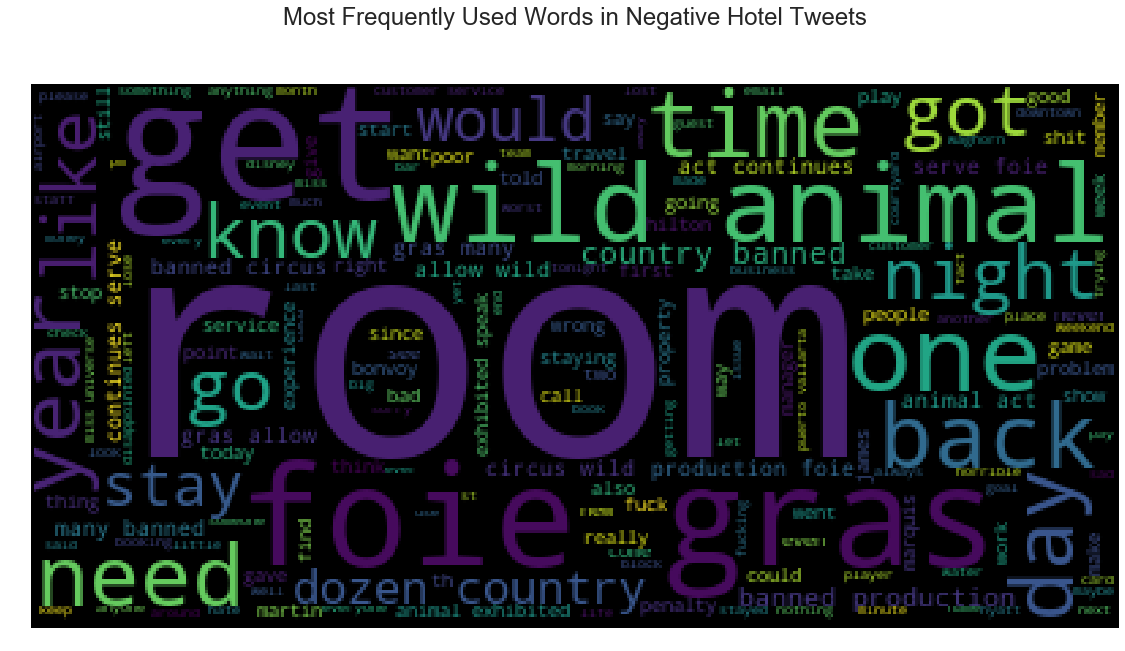

In [27]:
def wordcloud(tweets,col):
    stopwords = stop_words
    wordcloud = WordCloud(background_color="black",stopwords=stopwords,random_state = 42).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most Frequently Used Words in Negative Hotel Tweets\n\n", fontsize =24)
wordcloud(hotel_negative_tweets,'Tweet_Strings') 

Negative hotel tweets contain important information pertaining to the room. Somehow foie gras and wild animals are second and third. 

### Positive Online Travel Agency Tweets

In [28]:
ota_positive_tweets = pd.DataFrame(otas.loc[otas['Sentiment_VADER'] > 0])
ota_negative_tweets = pd.DataFrame(otas.loc[otas['Sentiment_VADER'] < 0])

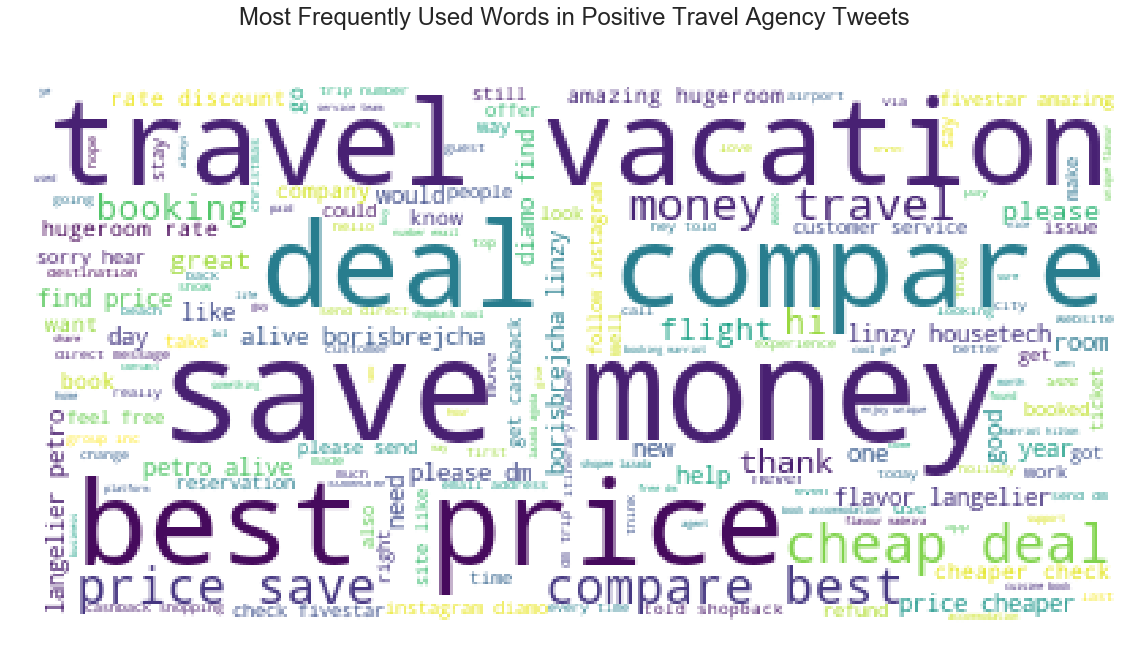

In [29]:
def wordcloud(tweets,col):
    stopwords = stop_words
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 42).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most Frequently Used Words in Positive Travel Agency Tweets\n\n", fontsize =24)
wordcloud(ota_positive_tweets,'Tweet_Strings') 

Positive Online Travel Agency tweets mention saving money, getting the best price, travel and vacations. These tweets reveal many recurring themes for online travel agencies. 

### Negative Online Travel Agency Tweets

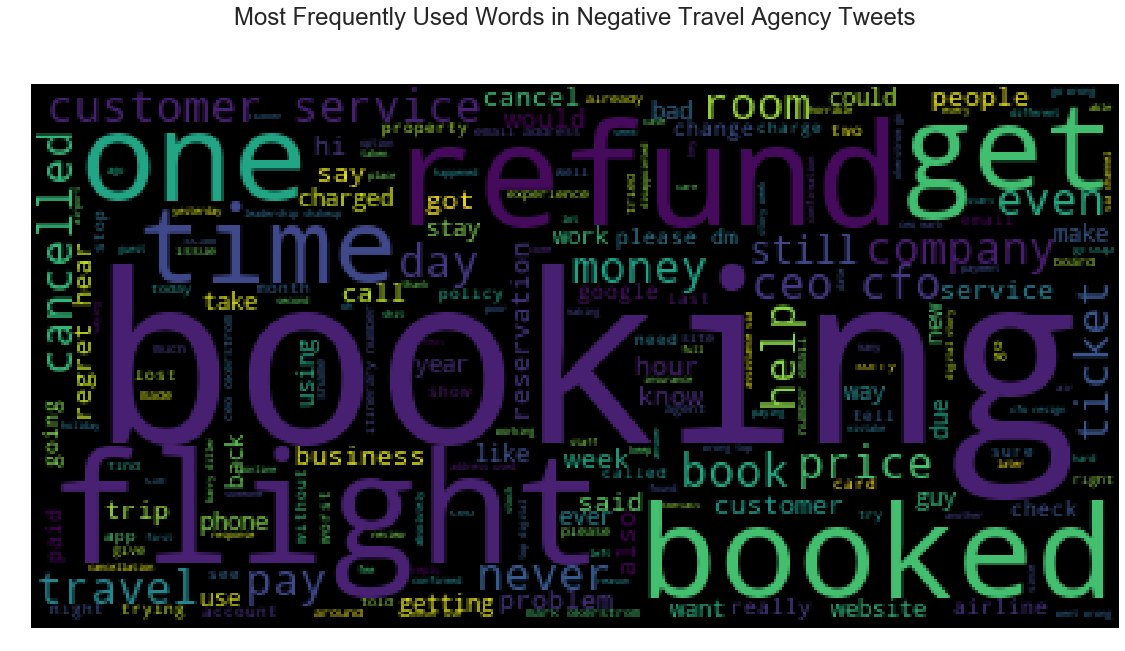

In [30]:
def wordcloud(tweets,col):
    stopwords = stop_words
    wordcloud = WordCloud(background_color="black",stopwords=stopwords,random_state = 42).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most Frequently Used Words in Negative Travel Agency Tweets\n\n", fontsize =24)
wordcloud(ota_negative_tweets,'Tweet_Strings') 

Negative online travel agency tweets most often mention booking, flights anf refunds. 

## N-grams

N-grams are a contiguous sequence of n items from a given sample of text or speech. The basic point of n-grams is that they capture the language structure from a statistical point of view, like what letter or word is likely to follow the given one before it. The top 20 n-grams by class will be reviewed. 

### Unigrams

Unigrams are the top single words used in the collection of tweets. 

In [31]:
#unigrams
def get_top_n_words(corpus, n=None):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
for key, val in enumerate(['Luxury','Premium','Select','Expedia','Priceline','Booking.com']):
    common_words = get_top_n_words(all_data['Tweet_Strings'].loc[all_data['Class']==val], n=20)
    df1 = pd.DataFrame(common_words, columns = ['Word','Freq'])
    df1.groupby('Word').sum()['Freq'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', color = '#008B8B', linecolor='black', title={'text':'Top 20 Most Common Words', 'y':0.9,
        'x':0.5, 'xanchor': 'center',
        'yanchor': 'top'})

### Bigrams

Bigrams are the top clusted of two words used in the collection of tweets. 

In [33]:
#bigrams
def get_top_n_bigram(corpus, n=None):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    vec = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
for key, val in enumerate(['Luxury','Premium','Select','Expedia','Priceline','Booking.com']):
    common_words = get_top_n_bigram(all_data['Tweet_Strings'].loc[all_data['Class']==val], n=20)
    df1 = pd.DataFrame(common_words, columns = ['Word','Freq'])
    df1.groupby('Word').sum()['Freq'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', color = '#7FFF00', linecolor='black', title={'text':'Top 20 Most Common Bigrams', 'y':0.9,
        'x':0.5, 'xanchor': 'center',
        'yanchor': 'top'})

### Trigrams

Trigrams are the top cluster of three words used in the collection of tweets. 

In [35]:
#trigrams
def get_top_n_trigram(corpus, n=None):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    vec = CountVectorizer(ngram_range=(3, 3),stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [36]:
for key, val in enumerate(['Luxury','Premium','Select','Expedia','Priceline','Booking.com']):
    common_words = get_top_n_trigram(all_data['Tweet_Strings'].loc[all_data['Class']==val], n=20)
    df1 = pd.DataFrame(common_words, columns = ['Word','Freq'])
    df1.groupby('Word').sum()['Freq'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', color = '#C71585',linecolor='black', title={'text':'Top 20 Most Common Trigrams', 'y':0.9,
        'x':0.5, 'xanchor': 'center',
        'yanchor': 'top'})